## Import

In [1]:
import pandas as pd
import numpy as np

# 데이터 합치기

In [2]:
file_list_place = ['Dataset\수도권_방문지_데이터_1.csv','Dataset\수도권_방문지_데이터_2.csv']
file_list_user = ['Dataset\수도권_여행객_데이터_1.csv','Dataset\수도권_여행객_데이터_2.csv']

dfs_place = [pd.read_csv(file) for file in file_list_place]
dfs_user = [pd.read_csv(file) for file in file_list_user]

merged_df_p = pd.concat(dfs_place, ignore_index=True)
merged_df_u = pd.concat(dfs_user, ignore_index=True)

merged_df_p.to_csv('Dataset\통합_방문지데이터.csv', index=False)
merged_df_u.to_csv('Dataset\통합_여행객데이터.csv', index=False)

# 방문지 데이터 전처리 진행

In [3]:
df1 = pd.read_csv('Dataset\통합_방문지데이터.csv')

## 필요없는 칼럼 삭제

In [4]:
df1_copy = df1.copy()
df1_copy = df1_copy.drop(['VISIT_AREA_ID','VISIT_ORDER','VISIT_START_YMD','VISIT_END_YMD','X_COORD','Y_COORD','ROAD_NM_CD','LOTNO_CD','POI_ID','POI_NM','VISIT_AREA_TYPE_CD','REVISIT_YN','VISIT_CHC_REASON_CD','LODGING_TYPE_CD','SGG_CD'], axis=1)
print(df1_copy.head())

   TRAVEL_ID VISIT_AREA_NM        ROAD_NM_ADDR           LOTNO_ADDR  \
0  a_a015688        프로방스마을  경기 파주시 탄현면 새오리로 77  경기 파주시 탄현면 성동리 82-1   
1  a_a000164        친구/친지집                 NaN       경기도 안산시 단원구 와동   
2  a_a004293       병점역 1호선      경기 화성시 떡전골로 97     경기 화성시 진안동 824-1   
3  a_a000491         더현대서울    서울 영등포구 여의대로 108      서울 영등포구 여의도동 22   
4  a_a000172        강릉중앙시장       강원 강릉시 금성로 21        강원 강릉시 성남동 50   

   RESIDENCE_TIME_MIN  DGSTFN  REVISIT_INTENTION  RCMDTN_INTENTION  
0                60.0     4.0                4.0               4.0  
1                 NaN     NaN                NaN               NaN  
2                30.0     4.0                5.0               5.0  
3               180.0     5.0                5.0               5.0  
4                30.0     4.0                4.0               4.0  


## 집, 숙소, 친구/친지집 삭제

In [5]:
removeValue = ['집', '숙소', '친구/친지집']
df_filtered = df1_copy[~df1_copy['VISIT_AREA_NM'].isin(removeValue)]

In [6]:
print(df_filtered.head())

   TRAVEL_ID VISIT_AREA_NM        ROAD_NM_ADDR           LOTNO_ADDR  \
0  a_a015688        프로방스마을  경기 파주시 탄현면 새오리로 77  경기 파주시 탄현면 성동리 82-1   
2  a_a004293       병점역 1호선      경기 화성시 떡전골로 97     경기 화성시 진안동 824-1   
3  a_a000491         더현대서울    서울 영등포구 여의대로 108      서울 영등포구 여의도동 22   
4  a_a000172        강릉중앙시장       강원 강릉시 금성로 21        강원 강릉시 성남동 50   
5  a_a000554           청계천                 NaN       서울 종로구 서린동 148   

   RESIDENCE_TIME_MIN  DGSTFN  REVISIT_INTENTION  RCMDTN_INTENTION  
0                60.0     4.0                4.0               4.0  
2                30.0     4.0                5.0               5.0  
3               180.0     5.0                5.0               5.0  
4                30.0     4.0                4.0               4.0  
5                60.0     4.0                4.0               4.0  


## 아파트, 오피스텔, 지하철, 펜션, 호텔값, 친척집, 사무실 제거

In [7]:
df_filtered = df_filtered[~df_filtered['VISIT_AREA_NM'].str.contains('아파트|오피스텔|호선|펜션|호텔|친척집|사무실')]
print(df_filtered.head(10))

    TRAVEL_ID VISIT_AREA_NM        ROAD_NM_ADDR             LOTNO_ADDR  \
0   a_a015688        프로방스마을  경기 파주시 탄현면 새오리로 77    경기 파주시 탄현면 성동리 82-1   
3   a_a000491         더현대서울    서울 영등포구 여의대로 108        서울 영등포구 여의도동 22   
4   a_a000172        강릉중앙시장       강원 강릉시 금성로 21          강원 강릉시 성남동 50   
5   a_a000554           청계천                 NaN         서울 종로구 서린동 148   
8   a_a006024         장안순대국  경기 수원시 팔달구 화서문로 58    경기 수원시 팔달구 신풍동 25-1   
10  a_a003557         유일닭강정  경기 가평군 가평읍 가화로 122   경기 가평군 가평읍 읍내리 471-2   
11  a_a000962         숙이네닭발   서울 용산구 우사단로10길 47     서울 용산구 한남동 732-148   
13  d_d004175    베드스테이션 선릉점    서울 강남구 선릉로92길 41      서울 강남구 삼성동 142-24   
17  a_a003234    서울 그로서리 클럽   서울 서대문구 연희로11가길 8                    NaN   
18  a_a004298      제부도 워터워크                 NaN  경기 화성시 서신면 송교리 377-46   

    RESIDENCE_TIME_MIN  DGSTFN  REVISIT_INTENTION  RCMDTN_INTENTION  
0                 60.0     4.0                4.0               4.0  
3                180.0     5.0               

## 주소 결측치, 도로명 주소로 통합 및 도로명 없을 시 원래 주소로 통합

In [8]:
# ROAD_NM_ADDR과 LOTNO_ADDR을 하나의 열로 합치기
df_filtered['COMBINED_ADDR'] = df_filtered['ROAD_NM_ADDR'].fillna(df_filtered['LOTNO_ADDR'])
# 기존 열 제거
df_filtered.drop(['ROAD_NM_ADDR', 'LOTNO_ADDR'], axis=1, inplace=True)
# 결측치 행 제거
df_filtered.dropna(subset=['COMBINED_ADDR'], inplace=True)

print(df_filtered.head(15))

    TRAVEL_ID VISIT_AREA_NM  RESIDENCE_TIME_MIN  DGSTFN  REVISIT_INTENTION  \
0   a_a015688        프로방스마을                60.0     4.0                4.0   
3   a_a000491         더현대서울               180.0     5.0                5.0   
4   a_a000172        강릉중앙시장                30.0     4.0                4.0   
5   a_a000554           청계천                60.0     4.0                4.0   
8   a_a006024         장안순대국                30.0     4.0                3.0   
10  a_a003557         유일닭강정                30.0     4.0                3.0   
11  a_a000962         숙이네닭발               120.0     5.0                5.0   
13  d_d004175    베드스테이션 선릉점               120.0     5.0                5.0   
17  a_a003234    서울 그로서리 클럽                30.0     4.0                3.0   
18  a_a004298      제부도 워터워크                 0.0     2.0                3.0   
19  a_a018121       의정부제일시장                60.0     5.0                5.0   
20  a_a002636           서울역                 0.0     5.0         

## 만족도(DFSTFN), 재방문의도(REVISIT_INTENTION), 추천하고싶은점수(RCMDTN_INTENTION), 체류시간(RESIDENCE_TIME_MIN) 결측치 처리(중앙값)

In [9]:
tdf = df_filtered

# 중앙값 계산
median_dgstfn = tdf['DGSTFN'].median()
median_revisit_intention = tdf['REVISIT_INTENTION'].median()
median_rcmdtn_intention = tdf['RCMDTN_INTENTION'].median()
median_residence_time = tdf['RESIDENCE_TIME_MIN'].median()

# 결측치를 중앙값으로 대체
tdf['DGSTFN'].fillna(median_dgstfn, inplace=True)
tdf['REVISIT_INTENTION'].fillna(median_revisit_intention, inplace=True)
tdf['RCMDTN_INTENTION'].fillna(median_rcmdtn_intention, inplace=True)
tdf['RESIDENCE_TIME_MIN'].fillna(median_residence_time, inplace=True)

# 결과 확인
print(tdf.head(20))

    TRAVEL_ID  VISIT_AREA_NM  RESIDENCE_TIME_MIN  DGSTFN  REVISIT_INTENTION  \
0   a_a015688         프로방스마을                60.0     4.0                4.0   
3   a_a000491          더현대서울               180.0     5.0                5.0   
4   a_a000172         강릉중앙시장                30.0     4.0                4.0   
5   a_a000554            청계천                60.0     4.0                4.0   
8   a_a006024          장안순대국                30.0     4.0                3.0   
10  a_a003557          유일닭강정                30.0     4.0                3.0   
11  a_a000962          숙이네닭발               120.0     5.0                5.0   
13  d_d004175     베드스테이션 선릉점               120.0     5.0                5.0   
17  a_a003234     서울 그로서리 클럽                30.0     4.0                3.0   
18  a_a004298       제부도 워터워크                 0.0     2.0                3.0   
19  a_a018121        의정부제일시장                60.0     5.0                5.0   
20  a_a002636            서울역                 0.0    

## 결측치 확인

In [10]:
#결측치 열 확인
missing_values =  tdf.isnull().sum()
print("결측치가 있는 열:")
print(missing_values[missing_values > 0])

결측치가 있는 열:
Series([], dtype: int64)


## csv로 저장

In [11]:
tdf.to_csv('Dataset/전완_방문지데이터_1.csv', index=False)

# 여행객 데이터 전처리 진행

## 필요없는 칼럼 삭제

In [12]:
df2 = pd.read_csv('Dataset\통합_여행객데이터.csv')

In [13]:
df2_copy = df2.copy()
df2_filtered = df2_copy[['TRAVELER_ID','GENDER', 'AGE_GRP','FAMILY_MEMB','TRAVEL_COMPANIONS_NUM']]
print(df2_filtered.head(5))

  TRAVELER_ID GENDER  AGE_GRP  FAMILY_MEMB  TRAVEL_COMPANIONS_NUM
0     b015583      여       20            5                      1
1     a001105      남       30            2                      7
2     a001673      여       30            3                      2
3     a017690      여       30            3                      3
4     c006666      여       30            3                      0


In [14]:
#결측치 열 확인
missing_values =  df2_filtered.isnull().sum()
print("결측치가 있는 열:")
print(missing_values[missing_values > 0])

결측치가 있는 열:
Series([], dtype: int64)


## csv로 저장

In [15]:
df2_filtered.to_csv('Dataset/전완_여행객데이터.csv',index=False)

### 최종 합치기

In [16]:
mdf1 = pd.read_csv('Dataset\전완_방문지데이터.csv')
mdf2 = pd.read_csv('Dataset\전완_여행객데이터.csv')

mdf1['TRAVELER_ID'] = mdf1['TRAVEL_ID'].str.slice(2)
TOTAL_DF = pd.merge(mdf1, mdf2, left_on='TRAVELER_ID', right_on='TRAVELER_ID', how = 'inner')

#traveler id 제거
TOTAL_DF = TOTAL_DF.drop('TRAVELER_ID', axis=1)

print(TOTAL_DF)

TOTAL_DF.to_csv('Dataset\최종합데이터.csv')

       TRAVEL_ID  VISIT_AREA_NM  RESIDENCE_TIME_MIN  DGSTFN  \
0      a_a015688         프로방스마을                60.0     4.0   
1      a_a015688          다온무인텔               360.0     3.0   
2      a_a015688        헤이리예술마을               150.0     4.0   
3      a_a015688     아이노스 출판단지점                30.0     5.0   
4      a_a015688  롯데프리미엄아울렛 파주점                90.0     5.0   
...          ...            ...                 ...     ...   
20769  a_a002580           평천면옥                30.0     4.0   
20770  a_a002580          안성팜랜드                60.0     4.0   
20771  a_a005553        을왕리해수욕장                60.0     4.0   
20772  a_a004630           에버랜드               570.0     5.0   
20773  a_a017925        인천차이나타운               270.0     4.0   

       REVISIT_INTENTION  RCMDTN_INTENTION             COMBINED_ADDR GENDER  \
0                    4.0               4.0        경기 파주시 탄현면 새오리로 77      남   
1                    2.0               3.0       경기 파주시 탄현면 성동로 7-25      남   
2     

PermissionError: [Errno 13] Permission denied: 'Dataset\\최종합데이터.csv'

# 그래프 확인

In [17]:
import csv2graph as cg

path = 'Dataset/최종합데이터.csv'
c2g = cg.csv2graph_D(path)
c2g.convert_to_graph()
c2g.convert_to_pyg_data()
pyg_graphs = c2g.get_pyg_graphs()

# 생성된 PyTorch Geometric 데이터 확인
print(f"Total graphs created: {len(pyg_graphs)}")
if len(pyg_graphs) > 0:
    first_graph = pyg_graphs[0]
    print("First graph details:")
    print(f"Number of nodes: {first_graph.num_nodes}")
    print(f"Number of edges: {first_graph.num_edges}")
    print(f"Node features shape: {first_graph.x.shape}")
    print(f"Edge index shape: {first_graph.edge_index.shape}")
    if first_graph.edge_attr is not None:
        print(f"Edge attributes shape: {first_graph.edge_attr.shape}")

c:\Users\kwonh\anaconda3\envs\AllLeave\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Total graphs created: 3522
First graph details:
Number of nodes: 2
Number of edges: 1
Node features shape: torch.Size([2, 3])
Edge index shape: torch.Size([2, 1])
Edge attributes shape: torch.Size([1, 1])


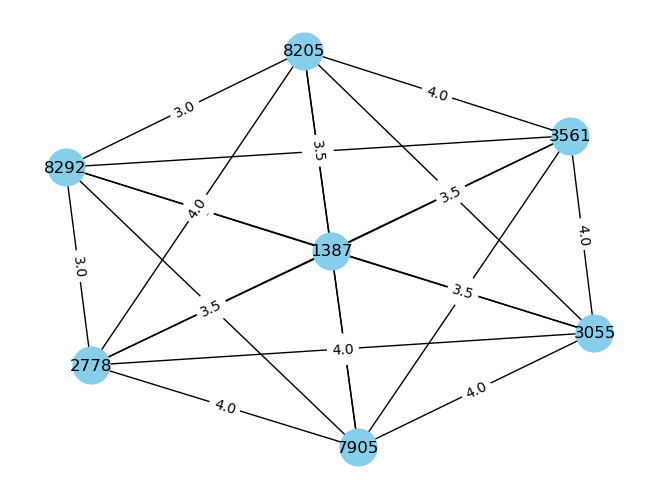

In [34]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_pyg_data(pyg_data):
    # PyTorch Geometric 데이터에서 NetworkX 그래프로 변환
    G = nx.Graph()
    edge_index = pyg_data.edge_index.numpy()
    edges = zip(edge_index[0], edge_index[1])
    G.add_edges_from(edges)
    
    # 노드 위치 결정
    pos = nx.spring_layout(G)
    
    # 노드와 엣지 그리기
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='k')
    
    # 엣지 가중치 레이블 추가 (있는 경우)
    if pyg_data.edge_attr is not None:
        edge_weights = { (u, v): pyg_data.edge_attr[i].item() for i, (u, v) in enumerate(G.edges()) }
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights)

    plt.show()

# 첫 번째 PyTorch Geometric 데이터 시각화
if len(pyg_graphs) > 0:
    visualize_pyg_data(pyg_graphs[3521])
